<a href="https://colab.research.google.com/github/kliller685/GenerateHightMap/blob/main/GenerateHeightmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генерация ландшафта

## Алгоритм


0.   Рассуждения о том, как создать ландшафт \\

1.   Генерация карты высотности \\

    1.1.   Создание случайного массива чисел на основе псевдослучайных чисел \\
    1.2.   Создание сетки со случайными нормированными(длина = 1) векторами на основе случайного массива чисел \\
    1.3.   Создание карты градиентов из сетки со случайными векторами \\
    1.4.   Создание карты высотности с параметрами используя карту градиентов \\

2.   Визуализация карты высотности \\

    2.1.   Создать график карты высотности \\
    2.2.   Добавить градиент от высоты \\
    2.3.   Добавить тени \\
    2.4.   Добавить воду(желательно уметь отдельно генерировать на каждой "впадине") \\

3.   Добавление текстур \\
    
    3.1.   Добавление текстуры травы \\
    3.2.   Добавить текстуру горы \\
    3.3.   Добавить текстуру воды \\

4.   Добавление растительности \\

    4.1. Добавить траву \\
    4.2. Добавить деревья \\
    **Необязательно:** \\
    4.3. Водоросли \\
    4.4. Животные \\

## Рассуждения и мат база
Нам нужно получить функцию $H \colon \mathbb{R}^2 \rightarrow \mathbb{R}$, которая описывает высоту нашей местности в точке $(x, y)$. Первое что приходит в голову, это использовать случайные числа для генерации, тогда нам потребуются множество случайных чисел(чтобы в дальнейшем можно было контролировать некоторые аспекты), а не только одно число, по которому будет сложно что-то понять. \\
Тогда разделим воображаемый ландшафт на нормированные ячейки $1 \times 1$. \\
Теперь определимся как мы будем работать с этими ячейками и случайными числами. \\
Нам нужно: \\


1.   Чтобы ландшафт был непрерывным. $→$ функция $G$(generator) должна принимать сразу несколько ячеек(в них есть случайные числа или всего одно случайное число), чтобы связать их. Значения на границах ячеек могут разниться, если разные ячейки не будут между собой связанны. \\
2.   Чтобы высота зависила от случайного числа. $→$ Функция $G$ должна использовать случайные числа из ячеек \\
3.   $\star$Чтобы высота зависила от параметра характеризующего ландшафт в текущей ячейке(полезно, если требуется изменить рельеф текущей местности после того, как генерация завершилась) $→$ следует разбить функцию $G$ на две: $E$("Earth" - "Земля") и $N$(noise - "шум").


\\
Сначала создадим массив(матрицу) $\mathbf{M}[n \times k]$ из случайнных чисел: \\
$\mathbf{M} = \begin{bmatrix}
m_{1, 1} & \cdots & m_{1, k} \\
\vdots & \ddots & \vdots \\
m_{n, 1} & \cdots & m_{n, k}
\end{bmatrix}$, \\
где $\mathbf{M}_{i, j} = m_{i, j} = \operatorname{rand}()$

\\
Теперь нам надо создать карту градиентов, а это по сути является непрерывной функции, которая принимает два аргумента $x$ и $y$. Нам просто нужно создать её, использовав как основу массив $\mathbf{M}$. \\
Возможные реализации карты градиентов из массива со случайными числами:


1.   Создание шума Перлина. \\
После того как мы разбили нашу ещё пустую местность на ячейки, мы сгенерировали на вершинах этих ячеек вектора(длинной 1) со случайным направлением. Теперь когда мы разобрались куда мы поставили наши случайные числа необходимо задать правило(функцию), которая будет с ними работать.
Создаём сетку $\mathbf{G}$(это другая G, здесь это как массив/матрица) из векторов $\vec{g}(i, j) = \mathbf{G}_{i, j} = (\cos{\theta_{i, j}}, \sin{\theta_{i, j}})$, где $\theta_{i, j} = \mathbf{M}_{i, j} \cdot 2 \pi = m_{i, j} \cdot 2 \pi$. По сути мы из массива случайных чисел создали "векторное поле", где вектора расположены только в точках $(i, j)$, т.е. с целыми координатами. И дальше мы идём по формулам: \\
$x^{\prime} = x - \lfloor {x} \rfloor$ \\
$y^{\prime} = y - \lfloor {y} \rfloor$ - эти две переменные будут отвечать за нашу точку "отсчёта" в ячейке \\
$u = \operatorname{smoothstep}(x^{\prime}),~ v = \operatorname{smoothstep}(y^{\prime}),$  - это нужно, чтобы создать непрерывный и резкий переход, хотя по сути мы сдвигаем нашу точку в ячейке как можно ближе к краю \\
$n_{1} = \vec{g}(\lfloor {x} \rfloor \bmod n, \lfloor {y} \rfloor \bmod k) \cdot (x^{\prime}, y^{\prime}),$ \\
$n_{2} = \vec{g}(\lceil {x} \rceil \bmod n, \lfloor {y} \rfloor \bmod k) \cdot (x^{\prime} - 1, y^{\prime}),$ \\
$n_{3} = \vec{g}(\lfloor {x} \rfloor \bmod n, \lceil {y} \rceil \bmod k) \cdot (x^{\prime}, y^{\prime} - 1),$ \\
$n_{4} = \vec{g}(\lceil {x} \rceil \bmod n, \lceil {y} \rceil \bmod k) \cdot (x^{\prime} - 1,  y^{\prime} - 1),$ - эти четыре скалярных произведения связывают нашу точку со случайными числами в ячейках(в данном случае с вершинами в ячейках). $n_{1}$ с точкой "отсчёта", $n_{2}$ с точкой стоящей дальше по оси $Ox$, $n_{3}$ с ... $Oy$, $n_{4}$ с точкой стоящей напротив точки "отсчёта". \\
$l_{1} = \operatorname{lerp}(n_{1}, n_{2}, u)$ \\
$l_{2} = \operatorname{lerp}(n_{3}, n_{4}, u)$ \\
$H(x, y) = \operatorname{lerp}(l_{1}, l_{2}, v)$ - и на последок, мы берём "среднее"(хотя это среднее арифметическое взвешенное). Можно считать, что мы берём в процентном соотношении от каждого значения. От $n_{1}$ мы берём $100u$% ($u \in [0, 1]$), от $n_{2}$ мы берём $(100-100u)$% и складываем оба значения. \\
*Функции и обозначения:* \\
*  $\lceil {x} \rceil$ - ближайшее целое не меньше $x$;
*  $\lfloor {x} \rfloor$ - ближайшее целое не больше $x$;
*   кривая Безье, $t \in [0, 1]$, либо просто линейная функция(в данном случае ещё и интерполяция), которая соединяет две точки $a$ и $b$ : $\operatorname{lerp}(a, b, t) = (b - a)t + a$; \\
*   Плавный шаг(smoothstep). По сути, это градиент(интерполяция похожая на сигмойду/sigmoid) от (0,0) до (1,1). Определяется рекурсивной формулой: \\
$\operatorname{smoothstep}_{n}(x)= {\begin{cases} 0, & { \text{if } x \leq 0 } \\ x^{n+1} \sum_{k=0}^{n} { \binom{n+k}{k} \binom{2n+1}{n-k} (-x)^{k} }, & { \text{if } 0 \leq x \leq 1 } \\ 1, & { \text{if } 1 \leq x } \\ \end{cases}}$ \\
Мы же будем использовать при $n=2$: $\operatorname{smoothstep}(x) = x^3 (10 + x(6x - 15));$

2.   Интерполяция \\
Пусть наш массив $\mathbf{M}$ - это уже "известные" нам высоты в точках с целыми координатами(опять буду считать, что $(i, j)$ не просто индексы, а ещё и координаты). Тогда мы хотим интерполировать наши точки(по сути создать функцию, которая будет принимать нужные нам значения в уже известных нам точках, но не предсказывающая их поведение как вниутри интервала, так и за его границами). \\
****


\\

# Создание Ландшафта с помощью шума Перлина

In [19]:
# @title Парочка терминов
'''
Код для генерации ландшафта(карты).
С использование Шума Перлина.
Основные термины:
Ландшафт - форма земной поверхности.
Карта - функция, принимающая два аргемента и возвращающая один(все точки и значения - числа)
colormap/cmap - цветовая карта, функция(отображение) сопоставляющее каждому скалярному значению свой цвет.
метод - функция, которая принадлежит объекту.
чанк, ячейка(квадрат) - термин, использующийся в шуме Перлина. Означает квадрат, в вершинах которого мы имеет векторы градиента.

Доп термины:
backend(Backend plot в нашем случае) - это библиотека или фреймворк для визуализации данных
фреймворк - готовый набор инструментов, библиотек и правил.
библиотека - готовый набор (модулей) функций и классов
флаг - переменная булевого типа(True/False), которая показывает, что что-то изменилось и что нужно на это отреагировать
'''
None

In [20]:
# @title Установка библиотек
!pip install ipympl
!pip install taichi

from google.colab import output
output.enable_custom_widget_manager()

## Numpy, Matplotlib

In [21]:
# @title Импорт библиотек
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.interpolate import pchip_interpolate

In [22]:
# @title Инициализация matplotlib
mpl.use('inline') # Backend для matplotlib
'''
На сайте поясняется, что всё значит
https://matplotlib.org/stable/users/explain/figure/backends.html
Возможные Аргументы:
'gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline', 'widget', 'ipympl'

Аргумент: [name][render]
name:
    qt, qt5, qt6 - qt canvas ( download PyQt or Qt for Python )
    wx - wxWidgets ( Python2, download wxPython 4 )
    gtk3, gtk4 - GTK 3/4 ( download PyGObject/pycairo )
    nb - jupyter notebook ( download notebook < 7 )
    ipympl, inline - jupyter lab ( download notebook >= 7 )
    tk - tk canvas ( download Tkinter )
    web - tornado server
*нужно устанавливать соответствующую библиотеку*
render:
    raster graphics:
        agg - png ( high quality images using the Anti-Grain Geometry engine )
        cairo - png ( Cario library, download pycairo or cairocffi )
    vector graphics:
        pdf - pdf ( pdf package or Portable Document Format )
        ps - ps/eps ( PostScript )
        svg - svg ( Scalable Vector Graphics )
'''
None

In [23]:
# @title Постоянные параметры
# Эти значения не будут изменяться
params_changed = True # Флаг для перезагрузки карты
Vector_height, Vector_width = 8, 8 # Размер карты градиентов

In [24]:
# @title Начальные значения переменных
# Параметры которые надо изменять, либо которые будут изменяться
amplitude = 1.0
frequency = 0.7
height_scale = 4
scale = 16.0
octaves = 6
persistence = 0.97
lacunarity = 1.12

In [ ]:
# @title Производные значения
map_scale = scale * max(1, Vector_height/Vector_width, (Vector_width/Vector_height))**2
map_height = int(Vector_height*map_scale)
map_width = int(Vector_width*map_scale)
map_scale

16.0

In [ ]:
# @title Создание colormap
colormap_size = 1000 # Цоличество цветов(разрешение)
cmap_name = 'terrain' # Название colormap из matplotlib
viridis = mpl.colormaps[cmap_name].resampled(256) # Функция colormap [0, 1] -> [R, G, B, Alpha]
colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов

In [ ]:
# Создание кастомной colormap(убрать коммент в импорте библиотек)
'''
Создание функции, которая имеет в заданных точках заданные значения, и при этом непрерывная.
Интерполяция идёт по трём цветовым каналам R(красный), G(зелёный), B(синий).
Первым аргументом мы задали точки, в которых хотим видеть определённый цвет.
Вторым аргументом мы задали значения цветов в заданных точках. Каждый канал цвета должен быть числом от 0 до 1.
Третий аргумент создаёт массив цветов, из которого мы будем забирать цвет.
Получаем:
[
 [R1, G1, B1],
 [R2, G2, B2],
 ...
 [R_N, G_N, B_N]
]

По желанию:
Метод flatten переводит из (N, 3) в (3*N, ).
Конечный вид будет таков:
[R1, G1, B1, R2, G2, B2, ..., R_N, G_N, B_N], где N = colormap_size
'''
# colormap = pchip_interpolate(
#     [0, 0.16, 0.42, 0.6425, 0.8575, 1],
#     np.array([[0, 7, 100], [32, 107, 203], [237, 255, 255], [255, 170, 0], [0, 2, 0], [0, 7, 100]]) / 255,
#     np.linspace(0, 1, colormap_size)
#     ).flatten()
None

In [ ]:
# @title Создаём массив случайных  чисел и векторов
# Массив(матрица) случайных векторов (случайные 2-мерные векторы)
np.random.seed(11233)
if 0: # 1 - через нормализацию, 0 - через случайный угол
    Vectors = np.random.rand(Vector_height, Vector_width, 2) * 2 - 1  # Случайные векторы в диапазоне [-1, 1]
    Vectors /= np.linalg.norm(Vectors, axis=2, keepdims=True)  # Нормализация векторов
else:
    Vectors_angle = np.random.rand(Vector_height, Vector_width) * 2 * np.pi  # Случайные векторы в диапазоне [-1, 1]
    Vectors = np.zeros(shape=(Vector_height, Vector_width, 2))
    Vectors[::, ::, 0] = np.cos(Vectors_angle)
    Vectors[::, ::, 1] = np.sin(Vectors_angle)

Vectors.shape

(8, 8, 2)

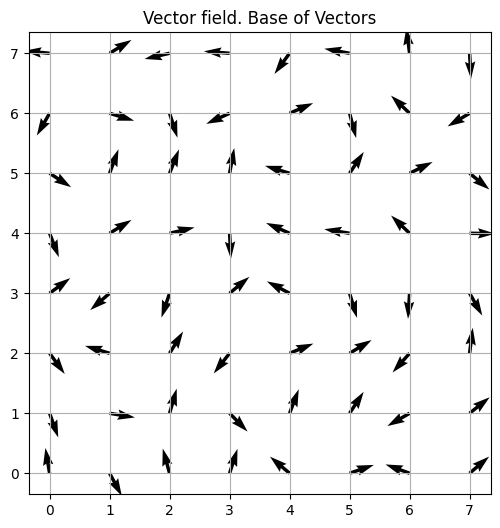

In [ ]:
# @title Визуализация векторного поля
fig, ax = plt.subplots(figsize=(6*max(1, Vector_width/Vector_height), 6*max(1, Vector_height/Vector_width)))

X, Y = np.meshgrid(np.arange(0, Vector_width, 1), np.arange(0, Vector_height, 1))
U, V = Vectors[:, :, 0], Vectors[:, :, 1]
Q = ax.quiver(X, Y, U, V, units='width', pivot='tail')

ax.set_title('Vector field. Base of Vectors')
ax.set_aspect(1, adjustable='box')
ax.grid(True)

In [ ]:
# @title Шум Перлина
# Функция для интерполяции(кривая Безье)
@np.vectorize
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    Кривая Безье между двемя точками.
    По сути, функция, которая изменяется линейно. При t=0 возвращает a, при t=1 возвращяет b
    '''
    return a + (b - a) * t

# Функция для сглаживания
@np.vectorize
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре ), но делает это плавно.
    '''
    return ( t**3 * (t * (6*t - 15) + 10) ) # if np.abs(t-0.5) < 0.5 else ( 0 if t <= 0 else 1 )

# Функция для вычисления шума Перлина
@np.vectorize
def perlin_noise(x, y):
    '''
    Шум Перлина
    1. Создать массив векторов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше Vector_height или Vector_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = np.dot(Vectors[x0 % Vector_height, y0 % Vector_width], [dx, dy])
    n1 = np.dot(Vectors[x1 % Vector_height, y0 % Vector_width], [dx - 1, dy])
    n2 = np.dot(Vectors[x0 % Vector_height, y1 % Vector_width], [dx, dy - 1])
    n3 = np.dot(Vectors[x1 % Vector_height, y1 % Vector_width], [dx - 1, dy - 1])

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)

In [ ]:
# @title Генерация heightmap
@np.vectorize
def generate_heightmap(map_height, map_width):
    '''
    Создание карты высотности с помощью шума Перлина
    Значения [0, 1]
    Параметры для редактирования:
        amp - Начальная амплитуда. Ничего не решает, но нужна для создания неровностей.
        freq - начальная частота. Чем выше, тем больше будет "острых пиков", чем ниже, тем больше будет походить на волну.
        persistence (< 1) - коэффициент, который показывает как сильно уменьшается амплитуда для каждого шума.
        lacunarity (> 1) - коэффициент, который показывает как сильно будет увеличиваться частота шума.

    Шаблоны:

    '''
    heightmap = np.zeros((map_height, map_width)) # Создаём пустую карту высотностей
    for i in range(map_height):
        for j in range(map_width):
            amp = amplitude # Начальная амплитуда(по сути ничего не решает, т.к. всё равно делим на max_value)
            freq = frequency # Начальная частота
            total = 0.0 # Конечное значение в данной точки
            max_value = 0.0 # Максимальное значение, которое может быть в этой точке

            for k in range(octaves):
                total += perlin_noise(i / scale * freq, j / scale * freq) * amp
                max_value += amp
                amp *= persistence
                freq *= lacunarity

            heightmap[i, j] = total / max_value  # Нормализация значения, т.е. переводим значения в [-1, 1]

    return heightmap / heightmap.max()

Text(0.5, 1.0, 'Heightmap base on Perlin Noise')

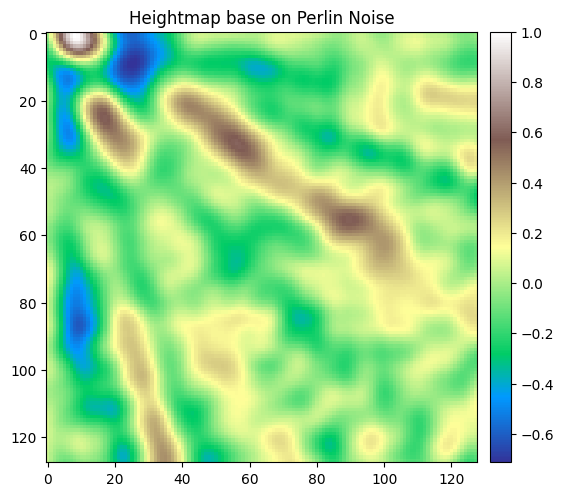

In [ ]:
# @title Визуализация heightmap
fig, ax = plt.subplots(figsize=(6, 6))

heightmap = generate_heightmap(map_height, map_width)
im = ax.imshow(heightmap, cmap=cmap_name)

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes('right', size='5%', pad='3%')
cb = fig.colorbar(im, cax=cax)
ax.set_title("Heightmap base on Perlin Noise")

(-0.5, 7.5)

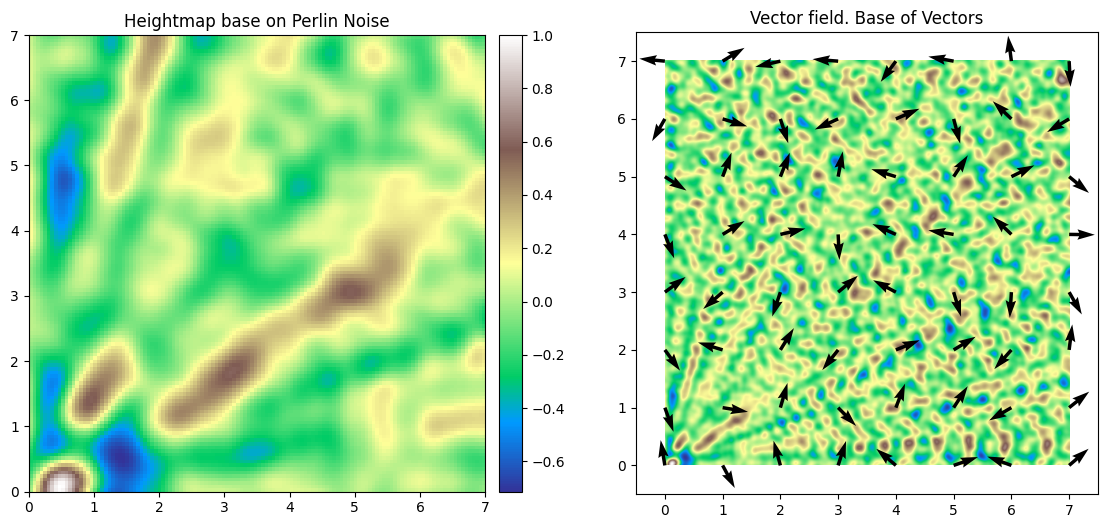

In [ ]:
# @title Визуализация heightmap и векторного поля
fig, axs = plt.subplots(1, 2, figsize=(6*2 * Vector_width/Vector_height + 2, 6))
ax1, ax2 = axs

# Ax 1
heightmap = generate_heightmap(map_height, map_width)
im1 = ax1.imshow(heightmap, cmap=cmap_name, origin='lower')
im1.set_extent([0, Vector_width-1, 0, Vector_height-1])

ax_divider = make_axes_locatable(ax1)
cax = ax_divider.append_axes('right', size='5%', pad='3%')
cb = fig.colorbar(im1, cax=cax)

ax1.set_title("Heightmap base on Perlin Noise")
ax2.set_xlim([0, Vector_height - 1])
ax2.set_ylim([0, Vector_width - 1])

# Ax 2
r = 64
heightmap = generate_heightmap(Vector_height*r, Vector_width*r)
X, Y = np.meshgrid(np.arange(0, Vector_width, 1), np.arange(0, Vector_height, 1))
U, V = Vectors[:, :, 0], Vectors[:, :, 1]

Q = ax2.quiver(X, Y, U, V, units='width', pivot='tail')
im2 = ax2.imshow(heightmap, cmap=cmap_name, origin='lower')
im2.set_extent([0, Vector_width-1, 0, Vector_height-1])

ax2.set_title('Vector field. Base of Vectors')
ax2.set_xlim([-0.5, Vector_width - 0.5])
ax2.set_ylim([-0.5, Vector_height - 0.5])

## Taichi, matplotlib

In [25]:
# @title Импорт библиотек
import taichi as ti
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.colors import LightSource
from scipy.interpolate import pchip_interpolate

[Taichi] version 1.7.3, llvm 15.0.4, commit 5ec301be, linux, python 3.11.13


In [26]:
# @title Инициализация matplotlib
mpl.use('inline') # Backend для matplotlib
'''
На сайте поясняется, что всё значит
https://matplotlib.org/stable/users/explain/figure/backends.html
Возможные Аргументы:
'gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline', 'widget', 'ipympl'

Аргумент: [name][render]
name:
    qt, qt5, qt6 - qt canvas ( download PyQt or Qt for Python )
    wx - wxWidgets ( Python2, download wxPython 4 )
    gtk3, gtk4 - GTK 3/4 ( download PyGObject/pycairo )
    nb - jupyter notebook ( download notebook < 7 )
    ipympl, inline - jupyter lab ( download notebook >= 7 )
    tk - tk canvas ( download Tkinter )
    web - tornado server
*нужно устанавливать соответствующую библиотеку*
render:
    raster graphics:
        agg - png ( high quality images using the Anti-Grain Geometry engine )
        cairo - png ( Cario library, download pycairo or cairocffi )
    vector graphics:
        pdf - pdf ( pdf package or Portable Document Format )
        ps - ps/eps ( PostScript )
        svg - svg ( Scalable Vector Graphics )
'''

"\nНа сайте поясняется, что всё значит\nhttps://matplotlib.org/stable/users/explain/figure/backends.html\nВозможные Аргументы:\n'gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline', 'widget', 'ipympl'\n\nАргумент: [name][render]\nname:\n    qt, qt5, qt6 - qt canvas ( download PyQt or Qt for Python )\n    wx - wxWidgets ( Python2, download wxPython 4 )\n    gtk3, gtk4 - GTK 3/4 ( download PyGObject/pycairo )\n    nb - jupyter notebook ( download notebook < 7 )\n    ipympl, inline - jupyter lab ( download notebook >= 7 )\n    tk - tk canvas ( download Tkinter )\n    web - tornado server\n*нужно устанавливать соответствующую библиотеку*\nrender:\n    raster graphics:\n        agg - png ( high quality images using the Anti-Grain Geometry engine )\n        cairo - png ( Cario library, download pycairo or c

In [27]:
# @title Незаконченные функции
# Гидравлическая эрозия(шаблон)
def hydraulic_erosion(heightmap, iterations=1000, rain_amount=0.01, erosion_rate=0.05, evaporation_rate=0.01):
    for _ in range(iterations):
        # Имитация дождя
        x, y = np.random.randint(0, heightmap.shape[0]), np.random.randint(0, heightmap.shape[1])
        water = rain_amount

        while water > 0:
            # Направление стекания
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            lowest = min(neighbors, key=lambda p: heightmap[p[0] % heightmap.shape[0], p[1] % heightmap.shape[1]])

            # Перенос грунта
            sediment = erosion_rate * water
            heightmap[x, y] -= sediment
            heightmap[lowest[0], lowest[1]] += sediment

            # Перемещение воды
            x, y = lowest
            water -= evaporation_rate * water
    return heightmap

# Термальная эрозия(шаблон)
def thermal_erosion(heightmap, iterations=100, threshold=0.1, erosion_rate=0.05):
    for _ in range(iterations):
        for x in range(1, heightmap.shape[0] - 1):
            for y in range(1, heightmap.shape[1] - 1):
                # Разница высот с соседями
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                diffs = [heightmap[x, y] - heightmap[nx, ny] for nx, ny in neighbors]

                # Перенос грунта
                for (nx, ny), diff in zip(neighbors, diffs):
                    if diff > threshold:
                        transfer = erosion_rate * diff
                        heightmap[x, y] -= transfer
                        heightmap[nx, ny] += transfer
    return heightmap

In [28]:
# @title Инициализация таблицы векторов
@ti.kernel
def init_Vectors():
    for i, j in Vectors:
        angle = ti.random() * 2 * np.pi # Случайный угол [0, 2pi]
        Vectors[i, j] = ti.Vector([ti.cos(angle), ti.sin(angle)]) # Единичный вектор

In [29]:
# @title Функция для вычисления шума Перлина
@ti.func
def perlin_noise(x, y):
    '''
    Шум Перлина
    1. Создать таблицу градиентов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше Vectors_height или Vectors_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = Vectors[x0 % Vectors_height, y0 % Vectors_width].dot(ti.Vector([dx, dy]))
    n1 = Vectors[x1 % Vectors_height, y0 % Vectors_width].dot(ti.Vector([dx - 1, dy]))
    n2 = Vectors[x0 % Vectors_height, y1 % Vectors_width].dot(ti.Vector([dx, dy - 1]))
    n3 = Vectors[x1 % Vectors_height, y1 % Vectors_width].dot(ti.Vector([dx - 1, dy - 1]))

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)

In [30]:
# @title Функция для генерации heightmap
# Функция для интерполяции(кривая Безье)
@ti.func
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    '''
    return a + (b - a) * t

# Функция для сглаживания
@ti.func
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре )
    '''
    return ( t**3 * (t * (6*t - 15) + 10) ) # if ti.abs(t-0.5) < 0.5 else ( 0 if t <= 0 else 1 )

# Генерация heightmap
@ti.kernel
def generate_heightmap():
    '''
    Создание карты высотности с помощью шума Перлина
    Значения [0, 1]
    Параметры для редактирования:
        amp - Начальная амплитуда. Ничего не решает, но нужна для создания неровностей.
        freq - начальная частота. Чем выше, тем больше будет "острых пиков", чем ниже, тем больше будет походить на волну.
        persistence (< 1) - коэффициент, который показывает как сильно уменьшается амплитуда для каждого шума.
        lacunarity (> 1) - коэффициент, который показывает как сильно будет увеличиваться частота шума.

    Шаблоны:

    '''
    for i, j in heightmap:
        amp = amplitude # Начальная амплитуда(по сути ничего не решает, т.к. всё равно делим на max_value)
        freq = frequency[None] # Начальная частота
        total = 0.0 # Конечное значение в данной точки
        max_value = 0.0 # Максимальное значение, которое может быть в этой точке

        for _ in range(octaves[None]):
            total += perlin_noise(i / scale[None] * freq, j / scale[None] * freq) * amp
            max_value += amp
            amp *= persistence[None]
            freq *= lacunarity[None]

        heightmap[i, j] = total / max_value # Переводим значение в [-1, 1]

In [31]:
# @title Генерация вершин и индексов
@ti.kernel
def generate_mesh(colormap: ti.types.ndarray()):
    '''
    Создаём mesh для трёхмерной поверхности с помощью триангуляции и задаём каждой вершине цвет
    Используем сгенерированную heightmap, чтобы создать вершины для карты(поля)
    Можно увеличить поле(квадратное) в map_scale раз в направлении осей x и z
    Можно увеличить высоту в height_scale раз в направлении y

    После создаём индыксы для двух треугольников
    '''
    for i, j in heightmap:
        x = i / map_width * map_scale[None] # Координата x для каждой вершины
        z = j / map_height * map_scale[None] # Координата z для каждой вершины
        y = heightmap[i, j] * height_scale[None] # Координата(высота) для каждой вершины
        vertices_3d[i + j * map_height] = ti.Vector([x, y, z]) # Задаём

        color_index = int( (heightmap[i, j]/2 + 0.5) * colormap_size) # [-1, 1, float] -> [0, 1000, int] для получения цвета по высоте
        for k in ti.static(range(3)):
            per_vertex_color[i + j * map_height][k] = colormap[color_index, k]
        # per_vertex_color[i + j * map_height][0] = cmap_r[color_index - 1] # Красный цвет вершины
        # per_vertex_color[i + j * map_height][1] = cmap_g[color_index - 1] # Зелёный цвет вершины
        # per_vertex_color[i + j * map_height][2] = cmap_b[color_index - 1] # Синий цвет вершины

    for i, j in ti.ndrange(map_width - 1, map_height - 1):
        # Создание индексов для треугольников для метода scene.mesh
        idx = (i * (map_height - 1) + j) * 6
        # Первый треугольник
        indices[idx] = i * map_height + j
        indices[idx + 1] = (i + 1) * map_height + j
        indices[idx + 2] = i * map_height + (j + 1)
        # Второй треугольник
        indices[idx + 3] = (i + 1) * map_height + j
        indices[idx + 4] = (i + 1) * map_height + (j + 1)
        indices[idx + 5] = i * map_height + (j + 1)

In [32]:
# @title Основная функция
def main():
    global params_changed

    # Инициализация градиентов
    init_Vectors()

    # Генерация heightmap
    generate_heightmap()

    Heightmap = heightmap.to_numpy()

    return Heightmap/np.max(Heightmap)

In [33]:
# @title Инициализация Taichi и выполнения кода
ti.init(arch=ti.vulkan) # Backend для taichi
'''
arch=ti.gpu/ti.cpu/ti.cuda/ti.vulkan/ti.opengl/ti.Metal/ti.x86_64/ti.x64
По методу понятно, что используется для Backend ( для отрисовки )
'''

# Постоянные параметры
params_changed = True # Флаг для перезагрузки карты
map_width, map_height = 512, 512 # Размер карты

# Поля для хранения переменных
frequency = ti.field(dtype=ti.f32, shape=())
height_scale = ti.field(dtype=ti.f32, shape=())
scale = ti.field(dtype=ti.f32, shape=())
map_scale = ti.field(dtype=ti.i32, shape=())
octaves = ti.field(dtype=ti.i32, shape=())
persistence = ti.field(dtype=ti.f32, shape=())
lacunarity = ti.field(dtype=ti.f32, shape=())

# Инициализация переменных
amplitude = 1.0
frequency[None] = 0.2
height_scale[None] = 1
scale[None] = 16.0
octaves[None] = 12
persistence[None] = 0.3
lacunarity[None] = 1.4

# Создание Taichi-поля для хранения heightmap
heightmap = ti.field(dtype=ti.f32, shape=(map_width, map_height))

# Создание Taichi-поля для хранения случайных векторов
Vectors_width, Vectors_height = 32, 32
Vectors = ti.Vector.field(2, dtype=ti.f32, shape=(Vectors_height, Vectors_width))

# Поля для вершин и их цвета, и индексов меша
per_vertex_color = ti.Vector.field(3, dtype=ti.f32, shape=map_width * map_height)
vertices_3d = ti.Vector.field(3, dtype=ti.f32, shape=map_width * map_height)
indices = ti.field(dtype=ti.i32, shape=((map_width - 1) * (map_height - 1) * 6))

# Создание colormap
colormap_size = 1000 # Цоличество цветов(разрешение)
cmap_name = 'terrain' # Название colormap из matplotlib
viridis = mpl.colormaps[cmap_name].resampled(256) # Функция colormap [0, 1] -> [R, G, B, Alpha]
colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов

# cmap_r = np.ascontiguousarray(colormap[::, 0]) # Отдельный массив для красного цвета
# cmap_g = np.ascontiguousarray(colormap[::, 1]) # Отдельный массив для зелёного цвета
# cmap_b = np.ascontiguousarray(colormap[::, 2]) # Отдельный массив для синего цвета
# В taichi ругается, когда пытаешься брать из массива размерность 2 и выше с помощью срезов

# Создание кастомной colormap
# colormap = pchip_interpolate(
#     [0, 0.16, 0.42, 0.6425, 0.8575, 1],
#     np.array([[0, 7, 100], [32, 107, 203], [237, 255, 255], [255, 170, 0], [0, 2, 0], [0, 7, 100]]) / 255,
#     np.linspace(0, 1, colormap_size)
#     ).flatten()

# Проверка на то, что программа запускается в качестве основной программы
if __name__ == "__main__":
    heightmap = main()

[Taichi] Starting on arch=x64


(0.0, 31.0)

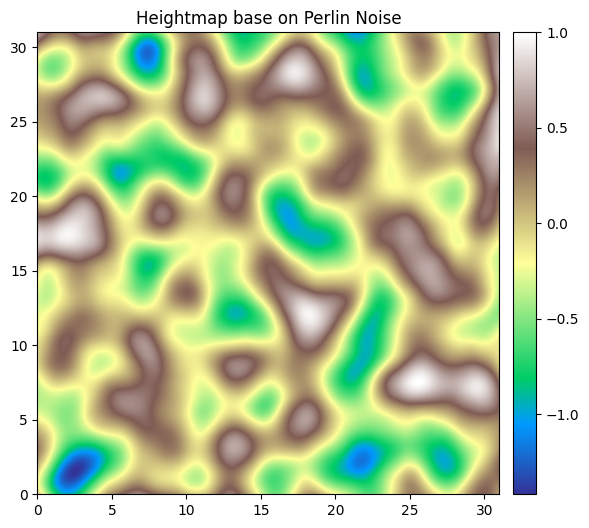

In [34]:
# @title Визуализация heightmap
fig, ax = plt.subplots(figsize=(6 * Vectors_width/Vectors_height + 2, 6))

im = ax.imshow(heightmap, cmap=cmap_name, origin='lower')
im.set_extent([0, Vectors_width-1, 0, Vectors_height-1])

ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes('right', size='5%', pad='3%')
cb = fig.colorbar(im, cax=cax)

ax.set_title("Heightmap base on Perlin Noise")
ax.set_xlim([0, Vectors_height - 1])
ax.set_ylim([0, Vectors_width - 1])

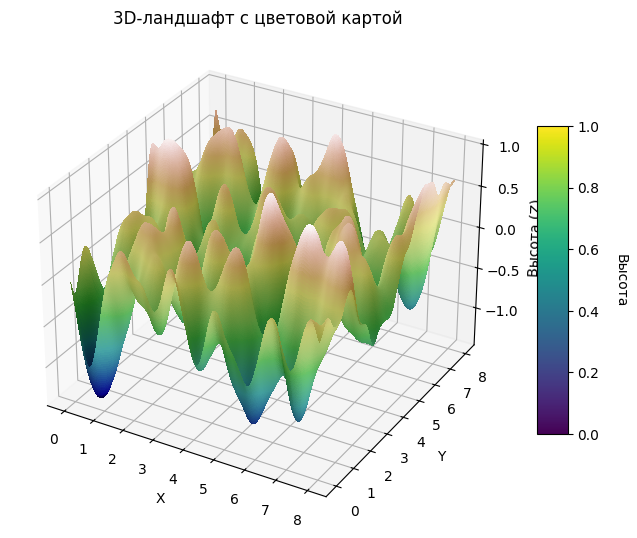

In [35]:
# @title 3D визуализация heightmap

# Load and format data
nrows, ncols = heightmap.shape
x = np.linspace(0, 8*max(1, Vectors_width/Vectors_height), ncols)
y = np.linspace(0, 8*max(1, Vectors_height/Vectors_width), nrows)
x, y = np.meshgrid(x, y)

region = np.s_[:, :]
x, y, z = x[region], y[region], heightmap[region]

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=mpl.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

# Настройка цветовой панели
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Высота', rotation=270, labelpad=20)

# Настройка осей и заголовка
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Высота (Z)')
ax.set_title('3D-ландшафт с цветовой картой')

plt.show()

In [ ]:
# @title Визуализация heightmap и векторного поля
fig, axs = plt.subplots(1, 2, figsize=(6*2 * Vector_width/Vector_height + 2, 6))
ax1, ax2 = axs

# Ax 1
im1 = ax1.imshow(heightmap, cmap=cmap_name, origin='lower')
im1.set_extent([0, Vector_width-1, 0, Vector_height-1])

ax_divider = make_axes_locatable(ax1)
cax = ax_divider.append_axes('right', size='5%', pad='3%')
cb = fig.colorbar(im1, cax=cax)

ax1.set_title("Heightmap base on Perlin Noise")
ax2.set_xlim([0, Vector_height - 1])
ax2.set_ylim([0, Vector_width - 1])

# Ax 2
r = 64
X, Y = np.meshgrid(np.arange(0, Vector_width, 1), np.arange(0, Vector_height, 1))
U, V = Vectors[:, :, 0], Vectors[:, :, 1]

Q = ax2.quiver(X, Y, U, V, units='width', pivot='tail')
im2 = ax2.imshow(heightmap, cmap=cmap_name, origin='lower')
im2.set_extent([0, Vector_width-1, 0, Vector_height-1])

ax2.set_title('Vector field. Base of Vectors')
ax2.set_xlim([-0.5, Vector_width - 0.5])
ax2.set_ylim([-0.5, Vector_height - 0.5])

# Код файлов

## Генерация Ландшафта(без текстур)

In [ ]:
# @title Код numpy v2
'''
Код для генерации ландшафта(карты).
С использование Шума Перлина.
Основные термины:
Карта = ландшафт - форма земной поверхности.
Поле/Taichi-поле/Векторное-поле - массив/тензор, который будет хранить какие-то либо значения/вектора.
colormap/cmap - цветовая карта, функция(отображение) сопоставляющее каждому скалярному значению свой цвет.
метод - функция, которая принадлежит объекту.
чанк(квадрат) - термин, который я использую в шуме Перлина, чтобы объяснить его работу. Означает квадрат, в вершинах которого мы имеет векторы градиента.

Доп термины:
backend(Backend plot в нашем случае) - это библиотека или фреймворк для визуализации данных
фреймворк - готовый набор инструментов, библиотек и правил.
библиотека - готовый набор (модулей) функций и классов
флаг - переменная булевого типа(True/False), которая показывает, что что-то изменилось и что нужно на это отреагировать
'''

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from scipy.interpolate import pchip_interpolate

# Инициализация matplotlib
mpl.use('inline') # Backend для matplotlib
'''
На сайте поясняется, что всё значит
https://matplotlib.org/stable/users/explain/figure/backends.html
Возможные Аргументы:
'gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline', 'widget', 'ipympl'

Аргумент: [name][render]
name:
    qt, qt5, qt6 - qt canvas ( download PyQt or Qt for Python )
    wx - wxWidgets ( Python2, download wxPython 4 )
    gtk3, gtk4 - GTK 3/4 ( download PyGObject/pycairo )
    nb - jupyter notebook ( download notebook < 7 )
    ipympl, inline - jupyter lab ( download notebook >= 7 )
    tk - tk canvas ( download Tkinter )
    web - tornado server
*нужно устанавливать соответствующую библиотеку*
render:
    raster graphics:
        agg - png ( high quality images using the Anti-Grain Geometry engine )
        cairo - png ( Cario library, download pycairo or cairocffi )
    vector graphics:
        pdf - pdf ( pdf package or Portable Document Format )
        ps - ps/eps ( PostScript )
        svg - svg ( Scalable Vector Graphics )
'''

# Создание кастомной colormap(убрать коммент в импорте библиотек)
'''
Создание функции, которая имеет в заданных точках заданные значения, и при этом непрерывная.
Интерполяция идёт по трём цветовым каналам R(красный), G(зелёный), B(синий).
Первым аргументом мы задали точки, в которых хотим видеть определённый цвет.
Вторым аргументом мы задали значения цветов в заданных точках. Каждый канал цвета должен быть числом от 0 до 1.
Третий аргумент создаёт массив цветов, из которого мы будем забирать цвет.
Получаем:
[
 [R1, G1, B1],
 [R2, G2, B2],
 ...
 [R_N, G_N, B_N]
]

По желанию:
Метод flatten переводит из (N, 3) в (3*N, ).
Конечный вид будет таков:
[R1, G1, B1, R2, G2, B2, ..., R_N, G_N, B_N], где N = colormap_size
'''
# colormap = pchip_interpolate(
#     [0, 0.16, 0.42, 0.6425, 0.8575, 1],
#     np.array([[0, 7, 100], [32, 107, 203], [237, 255, 255], [255, 170, 0], [0, 2, 0], [0, 7, 100]]) / 255,
#     np.linspace(0, 1, colormap_size)
#     ).flatten()

# Таблица градиентов (случайные 2-мерные векторы)
np.random.seed(11233)
if 0: # 1 - через нормализацию, 0 - через случайный угол
    Vectors = np.random.rand(Vector_height, Vector_width, 2) * 2 - 1  # Случайные векторы в диапазоне [-1, 1]
    Vectors /= np.linalg.norm(Vectors, axis=2, keepdims=True)  # Нормализация векторов
else:
    Vectors_angle = np.random.rand(Vector_height, Vector_width) * 2 * np.pi  # Случайные векторы в диапазоне [-1, 1]
    Vectors = np.zeros(shape=(Vector_height, Vector_width, 2))
    Vectors[::, ::, 0] = np.cos(Vectors_angle)
    Vectors[::, ::, 1] = np.sin(Vectors_angle)

# Функция для интерполяции(кривая Безье)
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    '''
    return a + (b - a) * t

# Функция для сглаживания
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре )
    '''
    return ( t**3 * (t * (6*t - 15) + 10) ) # if np.abs(t-0.5) < 0.5 else ( 0 if t <= 0 else 1 )

# Функция для вычисления шума Перлина
def perlin_noise(x, y):
    '''
    Шум Перлина
    1. Создать таблицу градиентов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше Vector_height или Vector_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = np.dot(Vectors[x0 % Vector_height, y0 % Vector_width], [dx, dy])
    n1 = np.dot(Vectors[x1 % Vector_height, y0 % Vector_width], [dx - 1, dy])
    n2 = np.dot(Vectors[x0 % Vector_height, y1 % Vector_width], [dx, dy - 1])
    n3 = np.dot(Vectors[x1 % Vector_height, y1 % Vector_width], [dx - 1, dy - 1])

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)


# Генерация heightmap
def generate_heightmap(map_height, map_width):
    '''
    Создание карты высотности с помощью шума Перлина
    Значения [0, 1]
    Параметры для редактирования:
        amp - Начальная амплитуда. Ничего не решает, но нужна для создания неровностей.
        freq - начальная частота. Чем выше, тем больше будет "острых пиков", чем ниже, тем больше будет походить на волну.
        persistence (< 1) - коэффициент, который показывает как сильно уменьшается амплитуда для каждого шума.
        lacunarity (> 1) - коэффициент, который показывает как сильно будет увеличиваться частота шума.

    Шаблоны:

    '''
    heightmap = np.zeros((map_height, map_width)) # Создаём пустую карту высотностей
    for i in range(map_height):
        for j in range(map_width):
            amp = amplitude # Начальная амплитуда(по сути ничего не решает, т.к. всё равно делим на max_value)
            freq = frequency # Начальная частота
            total = 0.0 # Конечное значение в данной точки
            max_value = 0.0 # Максимальное значение, которое может быть в этой точке

            for k in range(octaves):
                total += perlin_noise(i / scale * freq, j / scale * freq) * amp
                max_value += amp
                amp *= persistence
                freq *= lacunarity

            heightmap[i, j] = total / max_value  # Нормализация значения, т.е. переводим значения в [-1, 1]

    return heightmap / heightmap.max()

# Гидравлическая эрозия(шаблон)
def hydraulic_erosion(heightmap, iterations=1000, rain_amount=0.01, erosion_rate=0.05, evaporation_rate=0.01):
    for _ in range(iterations):
        # Имитация дождя
        x, y = np.random.randint(0, heightmap.shape[0]), np.random.randint(0, heightmap.shape[1])
        water = rain_amount

        while water > 0:
            # Направление стекания
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            lowest = min(neighbors, key=lambda p: heightmap[p[0] % heightmap.shape[0], p[1] % heightmap.shape[1]])

            # Перенос грунта
            sediment = erosion_rate * water
            heightmap[x, y] -= sediment
            heightmap[lowest[0], lowest[1]] += sediment

            # Перемещение воды
            x, y = lowest
            water -= evaporation_rate * water
    return heightmap

# Термальная эрозия(шаблон)
def thermal_erosion(heightmap, iterations=100, threshold=0.1, erosion_rate=0.05):
    for _ in range(iterations):
        for x in range(1, heightmap.shape[0] - 1):
            for y in range(1, heightmap.shape[1] - 1):
                # Разница высот с соседями
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                diffs = [heightmap[x, y] - heightmap[nx, ny] for nx, ny in neighbors]

                # Перенос грунта
                for (nx, ny), diff in zip(neighbors, diffs):
                    if diff > threshold:
                        transfer = erosion_rate * diff
                        heightmap[x, y] -= transfer
                        heightmap[nx, ny] += transfer
    return heightmap

# Основная функция
def main():
    # Визуализация heightmap и векторного поля
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    ax1, ax2 = axs

    # Ax 1
    heightmap = generate_heightmap(Vector_height*map_scale, Vector_width*map_scale)
    im1 = ax1.imshow(heightmap, cmap=cmap_name, origin='lower')
    im1.set_extent([0, Vector_width-1, 0, Vector_height-1])

    ax_divider = make_axes_locatable(ax1)
    cax = ax_divider.append_axes('right', size='5%', pad='3%')
    cb = fig.colorbar(im1, cax=cax)

    ax1.set_title("Heightmap base on Perlin Noise")
    ax2.set_xlim([0, Vector_height - 1])
    ax2.set_ylim([0, Vector_width - 1])

    # Ax 2
    heightmap = generate_heightmap(Vector_height*map_scale, Vector_width*map_scale)
    X, Y = np.meshgrid(np.arange(0, Vector_width, 1), np.arange(0, Vector_height, 1))
    U, V = Vectors[:, :, 0], Vectors[:, :, 1]

    Q = ax2.quiver(X, Y, U, V, units='width', pivot='tail')
    im2 = ax2.imshow(heightmap, cmap=cmap_name, origin='lower')
    im2.set_extent([0, Vector_width-1, 0, Vector_height-1])

    ax2.set_title('Vector field. Base of Vectors')
    ax2.set_xlim([-0.5, Vector_height - 0.5])
    ax2.set_ylim([-0.5, Vector_width - 0.5])

# Проверка на то, что программа запускается в качестве основной программы
if __name__ == "__main__":
    # Параметры
    params_changed = True # Флаг для перезагрузки карты
    Vector_width, Vector_height = 8, 8 # Размер карты градиентов

    # Начальные значения параметров
    amplitude = 1.0
    frequency = 0.3
    height_scale = 4
    scale = 16.0
    map_scale = int(scale)
    octaves = 1
    persistence = 1
    lacunarity = 1

    # Создание colormap
    colormap_size = 1000 # Цоличество цветов(разрешение)
    cmap_name = 'terrain' # Название colormap из matplotlib
    viridis = mpl.colormaps[cmap_name].resampled(256) # Функция colormap [0, 1] -> [R, G, B, Alpha]
    colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов
    main()


NameError: name 'Vector_height' is not defined

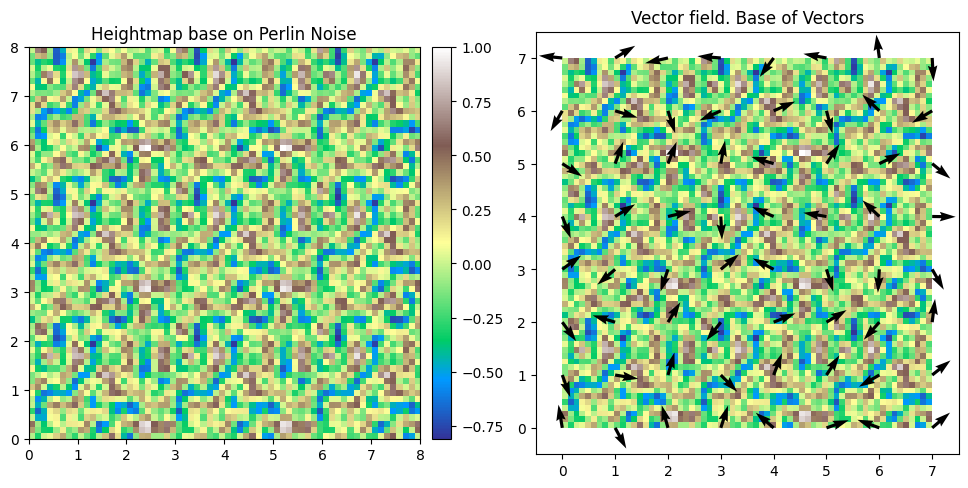

In [ ]:
# @title Код numpy v1
'''
Код для генерации ландшафта(карты).
С использование Шума Перлина.
Основные термины:
Карта = ландшафт - форма земной поверхности.
Поле/Taichi-поле/Векторное-поле - массив/тензор, который будет хранить какие-то либо значения/вектора.
colormap/cmap - цветовая карта, функция(отображение) сопоставляющее каждому скалярному значению свой цвет.
метод - функция, которая принадлежит объекту.
чанк(квадрат) - термин, который я использую в шуме Перлина, чтобы объяснить его работу. Означает квадрат, в вершинах которого мы имеет векторы градиента.

Доп термины:
backend(Backend plot в нашем случае) - это библиотека или фреймворк для визуализации данных
фреймворк - готовый набор инструментов, библиотек и правил.
библиотека - готовый набор (модулей) функций и классов
флаг - переменная булевого типа(True/False), которая показывает, что что-то изменилось и что нужно на это отреагировать
'''

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from scipy.interpolate import pchip_interpolate

# Инициализация matplotlib
mpl.use('inline') # Backend для matplotlib
'''
На сайте поясняется, что всё значит
https://matplotlib.org/stable/users/explain/figure/backends.html
Возможные Аргументы:
'gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline', 'widget', 'ipympl'

Аргумент: [name][render]
name:
    qt, qt5, qt6 - qt canvas ( download PyQt or Qt for Python )
    wx - wxWidgets ( Python2, download wxPython 4 )
    gtk3, gtk4 - GTK 3/4 ( download PyGObject/pycairo )
    nb - jupyter notebook ( download notebook < 7 )
    ipympl, inline - jupyter lab ( download notebook >= 7 )
    tk - tk canvas ( download Tkinter )
    web - tornado server
*нужно устанавливать соответствующую библиотеку*
render:
    raster graphics:
        agg - png ( high quality images using the Anti-Grain Geometry engine )
        cairo - png ( Cario library, download pycairo or cairocffi )
    vector graphics:
        pdf - pdf ( pdf package or Portable Document Format )
        ps - ps/eps ( PostScript )
        svg - svg ( Scalable Vector Graphics )
'''

# Параметры
params_changed = True # Флаг для перезагрузки карты
Vector_width, Vector_height = 8, 8 # Размер карты градиентов

# Начальные значения параметров
amplitude = 10.0
frequency = 0.35
height_scale = 4
scale = 1.0
map_scale = 15
octaves = 1
persistence = 0.2
lacunarity = 3

# Создание colormap
colormap_size = 1000 # Цоличество цветов(разрешение)
cmap_name = 'terrain' # Название colormap из matplotlib
viridis = mpl.colormaps[cmap_name].resampled(256) # Функция colormap [0, 1] -> [R, G, B, Alpha]
colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов

# Создание кастомной colormap(убрать коммент в импорте библиотек)
'''
Создание функции, которая имеет в заданных точках заданные значения, и при этом непрерывная.
Интерполяция идёт по трём цветовым каналам R(красный), G(зелёный), B(синий).
Первым аргументом мы задали точки, в которых хотим видеть определённый цвет.
Вторым аргументом мы задали значения цветов в заданных точках. Каждый канал цвета должен быть числом от 0 до 1.
Третий аргумент создаёт массив цветов, из которого мы будем забирать цвет.
Получаем:
[
 [R1, G1, B1],
 [R2, G2, B2],
 ...
 [R_N, G_N, B_N]
]

По желанию:
Метод flatten переводит из (N, 3) в (3*N, ).
Конечный вид будет таков:
[R1, G1, B1, R2, G2, B2, ..., R_N, G_N, B_N], где N = colormap_size
'''
# colormap = pchip_interpolate(
#     [0, 0.16, 0.42, 0.6425, 0.8575, 1],
#     np.array([[0, 7, 100], [32, 107, 203], [237, 255, 255], [255, 170, 0], [0, 2, 0], [0, 7, 100]]) / 255,
#     np.linspace(0, 1, colormap_size)
#     ).flatten()

# Таблица градиентов (случайные 2-мерные векторы)
np.random.seed(11233)
if 0: # 1 - через нормализацию, 0 - через случайный угол
    Vectors = np.random.rand(Vector_height, Vector_width, 2) * 2 - 1  # Случайные векторы в диапазоне [-1, 1]
    Vectors /= np.linalg.norm(Vectors, axis=2, keepdims=True)  # Нормализация векторов
else:
    Vectors_angle = np.random.rand(Vector_height, Vector_width) * 2 * np.pi  # Случайные векторы в диапазоне [-1, 1]
    Vectors = np.zeros(shape=(Vector_height, Vector_width, 2))
    Vectors[::, ::, 0] = np.cos(Vectors_angle)
    Vectors[::, ::, 1] = np.sin(Vectors_angle)

# Функция для интерполяции(кривая Безье)
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    '''
    return a + (b - a) * t

# Функция для сглаживания
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре )
    '''
    return ( t**3 * (t * (6*t - 15) + 10) ) # if np.abs(t-0.5) < 0.5 else ( 0 if t <= 0 else 1 )

# Функция для вычисления шума Перлина
def perlin_noise(x, y):
    '''
    Шум Перлина
    1. Создать таблицу градиентов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше Vector_height или Vector_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = np.dot(Vectors[x0 % Vector_height, y0 % Vector_width], [dx, dy])
    n1 = np.dot(Vectors[x1 % Vector_height, y0 % Vector_width], [dx - 1, dy])
    n2 = np.dot(Vectors[x0 % Vector_height, y1 % Vector_width], [dx, dy - 1])
    n3 = np.dot(Vectors[x1 % Vector_height, y1 % Vector_width], [dx - 1, dy - 1])

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)


# Генерация heightmap
def generate_heightmap(map_height, map_width):
    '''
    Создание карты высотности с помощью шума Перлина
    Значения [0, 1]
    Параметры для редактирования:
        amp - Начальная амплитуда. Ничего не решает, но нужна для создания неровностей.
        freq - начальная частота. Чем выше, тем больше будет "острых пиков", чем ниже, тем больше будет походить на волну.
        persistence (< 1) - коэффициент, который показывает как сильно уменьшается амплитуда для каждого шума.
        lacunarity (> 1) - коэффициент, который показывает как сильно будет увеличиваться частота шума.

    Шаблоны:

    '''
    heightmap = np.zeros((map_height, map_width)) # Создаём пустую карту высотностей
    for i in range(map_height):
        for j in range(map_width):
            amp = amplitude # Начальная амплитуда(по сути ничего не решает, т.к. всё равно делим на max_value)
            freq = frequency # Начальная частота
            total = 0.0 # Конечное значение в данной точки
            max_value = 0.0 # Максимальное значение, которое может быть в этой точке

            for k in range(octaves):
                total += perlin_noise(i / scale * freq, j / scale * freq) * amp
                max_value += amp
                amp *= persistence
                freq *= lacunarity

            heightmap[i, j] = total / max_value  # Нормализация значения, т.е. переводим значения в [-1, 1]

    return heightmap / heightmap.max()

# Гидравлическая эрозия(шаблон)
def hydraulic_erosion(heightmap, iterations=1000, rain_amount=0.01, erosion_rate=0.05, evaporation_rate=0.01):
    for _ in range(iterations):
        # Имитация дождя
        x, y = np.random.randint(0, heightmap.shape[0]), np.random.randint(0, heightmap.shape[1])
        water = rain_amount

        while water > 0:
            # Направление стекания
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            lowest = min(neighbors, key=lambda p: heightmap[p[0] % heightmap.shape[0], p[1] % heightmap.shape[1]])

            # Перенос грунта
            sediment = erosion_rate * water
            heightmap[x, y] -= sediment
            heightmap[lowest[0], lowest[1]] += sediment

            # Перемещение воды
            x, y = lowest
            water -= evaporation_rate * water
    return heightmap

# Термальная эрозия(шаблон)
def thermal_erosion(heightmap, iterations=100, threshold=0.1, erosion_rate=0.05):
    for _ in range(iterations):
        for x in range(1, heightmap.shape[0] - 1):
            for y in range(1, heightmap.shape[1] - 1):
                # Разница высот с соседями
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                diffs = [heightmap[x, y] - heightmap[nx, ny] for nx, ny in neighbors]

                # Перенос грунта
                for (nx, ny), diff in zip(neighbors, diffs):
                    if diff > threshold:
                        transfer = erosion_rate * diff
                        heightmap[x, y] -= transfer
                        heightmap[nx, ny] += transfer
    return heightmap

# Основная функция
def main():
    # Генерация heightmap

    # print(heightmap)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    ax1, ax2 = axs

    # Ax 1
    heightmap = generate_heightmap(64, 64)
    im1 = ax1.imshow(heightmap, cmap=cmap_name)
    im1.set_extent([0, 8, 0, 8])

    ax_divider = make_axes_locatable(ax1)
    cax = ax_divider.append_axes('right', size='5%', pad='3%')
    cb = fig.colorbar(im1, cax=cax)

    ax1.set_title("Heightmap base on Perlin Noise")

    # Ax 2
    r = 8
    heightmap = generate_heightmap(Vector_height*r, Vector_width*r)
    X, Y = np.meshgrid(np.arange(0, Vector_width, 1), np.arange(0, Vector_height, 1))
    U, V = Vectors[:, :, 0], Vectors[:, :, 1]

    Q = ax2.quiver(X, Y, U, V, units='width', pivot='tail')
    im2 = ax2.imshow(heightmap, cmap=cmap_name, origin='lower')
    im2.set_extent([0, Vector_width-1, Vector_height-1, 0])

    ax2.set_title('Vector field. Base of Vectors')
    ax2.set_xlim([-0.5, Vector_height - 0.5])
    ax2.set_ylim([-0.5, Vector_width - 0.5])

# Проверка на то, что программа запускается в качестве основной программы
if __name__ == "__main__":
    main()


In [ ]:
# @title Код taichi
!pip install taichi
'''
Код для генерации ландшафта(карты).
С использование Шума Перлина.
Основные термины:
Карта = ландшафт - форма земной поверхности.
Поле/Taichi-поле/Векторное-поле - массив/тензор, который будет хранить какие-то либо значения/вектора.
colormap/cmap - цветовая карта, функция(отображение) сопоставляющее каждому скалярному значению свой цвет.
метод - функция, которая принадлежит объекту.
чанк(квадрат) - термин, который я использую в шуме Перлина, чтобы объяснить его работу. Означает квадрат, в вершинах которого мы имеет векторы градиента.

Доп термины:
backend(Backend plot в нашем случае) - это библиотека или фреймворк для визуализации данных
фреймворк - готовый набор инструментов, библиотек и правил.
библиотека - готовый набор (модулей) функций и классов
флаг - переменная булевого типа(True/False), которая показывает, что что-то изменилось и что нужно на это отреагировать
'''

import taichi as ti
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from scipy.interpolate import pchip_interpolate

# Инициализация Taichi и matplotlib
ti.init(arch=ti.vulkan) # Backend для taichi
'''
arch=ti.gpu/ti.cpu/ti.cuda/ti.vulkan/ti.opengl/ti.Metal/ti.x86_64/ti.x64
По методу понятно, что используется для Backend ( для отрисовки )
'''

mpl.use('qt5agg') # Backend для matplotlib
'''
На сайте поясняется, что всё значит
https://matplotlib.org/stable/users/explain/figure/backends.html
Возможные Аргументы:
'gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline', 'widget', 'ipympl'

Аргумент: [name][render]
name:
    qt, qt5, qt6 - qt canvas ( download PyQt or Qt for Python )
    wx - wxWidgets ( Python2, download wxPython 4 )
    gtk3, gtk4 - GTK 3/4 ( download PyGObject/pycairo )
    nb - jupyter notebook ( download notebook < 7 )
    ipympl, inline - jupyter lab ( download notebook >= 7 )
    tk - tk canvas ( download Tkinter )
    web - tornado server
*нужно устанавливать соответствующую библиотеку*
render:
    raster graphics:
        agg - png ( high quality images using the Anti-Grain Geometry engine )
        cairo - png ( Cario library, download pycairo or cairocffi )
    vector graphics:
        pdf - pdf ( pdf package or Portable Document Format )
        ps - ps/eps ( PostScript )
        svg - svg ( Scalable Vector Graphics )
'''

# Параметры
params_changed = True # Флаг для перезагрузки карты
map_width, map_height = 512, 512 # Размер карты

# Поля для хранения параметров
frequency = ti.field(dtype=ti.f32, shape=())
height_scale = ti.field(dtype=ti.f32, shape=())
scale = ti.field(dtype=ti.f32, shape=())
map_scale = ti.field(dtype=ti.i32, shape=())
octaves = ti.field(dtype=ti.i32, shape=())
persistence = ti.field(dtype=ti.f32, shape=())
lacunarity = ti.field(dtype=ti.f32, shape=())

# Начальные значения параметров
amplitude = 10.0
frequency[None] = 0.35
height_scale[None] = 4
scale[None] = 150.0
map_scale[None] = 15
octaves[None] = 6
persistence[None] = 0.2
lacunarity[None] = 3

# Создание Taichi-поля для хранения heightmap
heightmap = ti.field(dtype=ti.f32, shape=(map_width, map_height))

# Таблица градиентов (случайные 2-мерные векторы)
Vectors_width, Vectors_height = 256, 256
Vectors = ti.Vector.field(2, dtype=ti.f32, shape=(Vectors_height, Vectors_width))

# Поля для вершин и их цвета, и индексов меша
per_vertex_color = ti.Vector.field(3, dtype=ti.f32, shape=map_width * map_height)
vertices_3d = ti.Vector.field(3, dtype=ti.f32, shape=map_width * map_height)
indices = ti.field(dtype=ti.i32, shape=((map_width - 1) * (map_height - 1) * 6))

# Создание colormap
colormap_size = 1000 # Цоличество цветов(разрешение)
cmap_name = 'terrain' # Название colormap из matplotlib
viridis = mpl.colormaps[cmap_name].resampled(256) # Функция colormap [0, 1] -> [R, G, B, Alpha]
colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов

print(type(colormap))

# cmap_r = np.ascontiguousarray(colormap[::, 0]) # Отдельный массив для красного цвета
# cmap_g = np.ascontiguousarray(colormap[::, 1]) # Отдельный массив для зелёного цвета
# cmap_b = np.ascontiguousarray(colormap[::, 2]) # Отдельный массив для синего цвета
# В taichi ругается, когда пытаешься брать из массива размерность 2 и выше с помощью срезов

# Создание кастомной colormap
# colormap = pchip_interpolate(
#     [0, 0.16, 0.42, 0.6425, 0.8575, 1],
#     np.array([[0, 7, 100], [32, 107, 203], [237, 255, 255], [255, 170, 0], [0, 2, 0], [0, 7, 100]]) / 255,
#     np.linspace(0, 1, colormap_size)
#     ).flatten()


# Гидравлическая эрозия(шаблон)
def hydraulic_erosion(heightmap, iterations=1000, rain_amount=0.01, erosion_rate=0.05, evaporation_rate=0.01):
    for _ in range(iterations):
        # Имитация дождя
        x, y = np.random.randint(0, heightmap.shape[0]), np.random.randint(0, heightmap.shape[1])
        water = rain_amount

        while water > 0:
            # Направление стекания
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            lowest = min(neighbors, key=lambda p: heightmap[p[0] % heightmap.shape[0], p[1] % heightmap.shape[1]])

            # Перенос грунта
            sediment = erosion_rate * water
            heightmap[x, y] -= sediment
            heightmap[lowest[0], lowest[1]] += sediment

            # Перемещение воды
            x, y = lowest
            water -= evaporation_rate * water
    return heightmap

# Термальная эрозия(шаблон)
def thermal_erosion(heightmap, iterations=100, threshold=0.1, erosion_rate=0.05):
    for _ in range(iterations):
        for x in range(1, heightmap.shape[0] - 1):
            for y in range(1, heightmap.shape[1] - 1):
                # Разница высот с соседями
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                diffs = [heightmap[x, y] - heightmap[nx, ny] for nx, ny in neighbors]

                # Перенос грунта
                for (nx, ny), diff in zip(neighbors, diffs):
                    if diff > threshold:
                        transfer = erosion_rate * diff
                        heightmap[x, y] -= transfer
                        heightmap[nx, ny] += transfer
    return heightmap

# Инициализация градиентов
@ti.kernel
def init_Vectors():
    for i, j in Vectors:
        angle = ti.random() * 2 * np.pi # Случайный угол [0, 2pi]
        Vectors[i, j] = ti.Vector([ti.cos(angle), ti.sin(angle)]) # Единичный вектор

# Функция для вычисления шума Перлина
@ti.func
def perlin_noise(x, y):
    '''
    Шум Перлина
    1. Создать таблицу градиентов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше Vectors_height или Vectors_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = Vectors[x0 % Vectors_height, y0 % Vectors_width].dot(ti.Vector([dx, dy]))
    n1 = Vectors[x1 % Vectors_height, y0 % Vectors_width].dot(ti.Vector([dx - 1, dy]))
    n2 = Vectors[x0 % Vectors_height, y1 % Vectors_width].dot(ti.Vector([dx, dy - 1]))
    n3 = Vectors[x1 % Vectors_height, y1 % Vectors_width].dot(ti.Vector([dx - 1, dy - 1]))

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)

# Функция для интерполяции(кривая Безье)
@ti.func
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    '''
    return a + (b - a) * t

# Функция для сглаживания
@ti.func
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре )
    '''
    return ( t**3 * (t * (6*t - 15) + 10) ) # if ti.abs(t-0.5) < 0.5 else ( 0 if t <= 0 else 1 )

# Генерация heightmap
@ti.kernel
def generate_heightmap():
    '''
    Создание карты высотности с помощью шума Перлина
    Значения [0, 1]
    Параметры для редактирования:
        amp - Начальная амплитуда. Ничего не решает, но нужна для создания неровностей.
        freq - начальная частота. Чем выше, тем больше будет "острых пиков", чем ниже, тем больше будет походить на волну.
        persistence (< 1) - коэффициент, который показывает как сильно уменьшается амплитуда для каждого шума.
        lacunarity (> 1) - коэффициент, который показывает как сильно будет увеличиваться частота шума.

    Шаблоны:

    '''
    for i, j in heightmap:
        amp = amplitude # Начальная амплитуда(по сути ничего не решает, т.к. всё равно делим на max_value)
        freq = frequency[None] # Начальная частота
        total = 0.0 # Конечное значение в данной точки
        max_value = 0.0 # Максимальное значение, которое может быть в этой точке

        for _ in range(octaves[None]):
            total += perlin_noise(i / scale[None] * freq, j / scale[None] * freq) * amp
            max_value += amp
            amp *= persistence[None]
            freq *= lacunarity[None]

        heightmap[i, j] = total / max_value # Переводим значение в [-1, 1]

# Генерация вершин и индексов
@ti.kernel
def generate_mesh(colormap: ti.types.ndarray()):
    '''
    Создаём mesh для трёхмерной поверхности с помощью триангуляции и задаём каждой вершине цвет
    Используем сгенерированную heightmap, чтобы создать вершины для карты(поля)
    Можно увеличить поле(квадратное) в map_scale раз в направлении осей x и z
    Можно увеличить высоту в height_scale раз в направлении y

    После создаём индыксы для двух треугольников
    '''
    for i, j in heightmap:
        x = i / map_width * map_scale[None] # Координата x для каждой вершины
        z = j / map_height * map_scale[None] # Координата z для каждой вершины
        y = heightmap[i, j] * height_scale[None] # Координата(высота) для каждой вершины
        vertices_3d[i + j * map_height] = ti.Vector([x, y, z]) # Задаём

        color_index = int( (heightmap[i, j]/2 + 0.5) * colormap_size) # [-1, 1, float] -> [0, 1000, int] для получения цвета по высоте
        for k in ti.static(range(3)):
            per_vertex_color[i + j * map_height][k] = colormap[color_index, k]
        # per_vertex_color[i + j * map_height][0] = cmap_r[color_index - 1] # Красный цвет вершины
        # per_vertex_color[i + j * map_height][1] = cmap_g[color_index - 1] # Зелёный цвет вершины
        # per_vertex_color[i + j * map_height][2] = cmap_b[color_index - 1] # Синий цвет вершины

    for i, j in ti.ndrange(map_width - 1, map_height - 1):
        # Создание индексов для треугольников для метода scene.mesh
        idx = (i * (map_height - 1) + j) * 6
        # Первый треугольник
        indices[idx] = i * map_height + j
        indices[idx + 1] = (i + 1) * map_height + j
        indices[idx + 2] = i * map_height + (j + 1)
        # Второй треугольник
        indices[idx + 3] = (i + 1) * map_height + j
        indices[idx + 4] = (i + 1) * map_height + (j + 1)
        indices[idx + 5] = i * map_height + (j + 1)

# Основная функция
def main():
    global params_changed, colormap

    # Инициализация градиентов
    init_Vectors()

    # Генерация heightmap
    generate_heightmap()

    # Окно для визуализации
    window = ti.ui.Window("3D Heightmap Visualization", (1020, 780))
    canvas = window.get_canvas()
    scene = ti.ui.Scene()
    camera = ti.ui.Camera()
    gui = window.get_gui()

    # Настройка камеры
    camera.position(0.5, 1.5, 2.5)  # Позиция камеры
    camera.lookat(0.5, 0.0, 0.5)    # Точка, на которую смотрит камера
    camera.up(0, 1, 0)              # Вектор "вверх"

    while window.running:
        # Обработка событий камеры
        camera.track_user_inputs(window, movement_speed=0.1, hold_key=ti.ui.RMB)
        scene.set_camera(camera)

        # Очистка сцены
        scene.point_light(pos=(0.5, 1.5, 0.5), color=(1, 1, 1))
        scene.ambient_light(color=(0.5, 0.5, 0.5))

        # Создание окна с слайдерами
        with gui.sub_window("Controls", 0.05, 0.05, 0.3, 0.4) as w:
            # Сохраняем старые значения параметров
            old_frequency = frequency[None]
            old_height_scale = height_scale[None]
            old_scale = scale[None]
            old_octaves = octaves[None]
            old_persistence = persistence[None]
            old_lacunarity = lacunarity[None]

            # Обновляем параметры через слайдеры
            frequency[None] = w.slider_float("Frequency", frequency[None], 0.001, 5)
            height_scale[None] = w.slider_float("Height Scale", height_scale[None], 0.01, 5.0)
            scale[None] = w.slider_float("Scale", scale[None], 50, 500.0)
            map_scale[None] = w.slider_int("Map Scale", map_scale[None], 1, 20)
            octaves[None] = w.slider_int("Octaves", octaves[None], 1, 10)
            persistence[None] = w.slider_float("Persistence", persistence[None], 0.0, 1.0)
            lacunarity[None] = w.slider_float("Lacunarity", lacunarity[None], 1, 10.0)

            # Проверяем, изменились ли параметры
            if (old_frequency != frequency[None] or
                old_height_scale != height_scale[None] or
                old_scale != scale[None] or
                old_octaves != octaves[None] or
                old_persistence != persistence[None] or
                old_lacunarity != lacunarity[None]):
                params_changed = True
                # print('Params was changed')

            # Кнопка Refresh
            if w.button("Refresh"):
                params_changed = True

            if w.button('Matplotlib'):
                # График heightmap в matplotlib
                heightmap_np = heightmap.to_numpy()
                print(heightmap_np.max(), heightmap_np.min())
                plt.imshow(heightmap_np, cmap=cmap_name)
                plt.colorbar()
                plt.title("Perlin Noise with Custom Implementation (Octaves, Persistence, Lacunarity)")
                plt.show()

        # Если параметры изменились, пересчитываем карту высотности и mesh
        if params_changed:
            # Пересоздаём таблицу градиентов и вновь создаём карту высотностей
            init_Vectors()
            generate_heightmap()
            params_changed = False  # Сбрасываем флаг

        # Создание mash
        generate_mesh(colormap)

        # Отрисовка mesh
        scene.mesh(
            vertices=vertices_3d,
            indices=indices,
            per_vertex_color=per_vertex_color,
            color=(1, 0, 1)
        )

        # Отрисовка сцены
        canvas.scene(scene)
        window.show()

# Проверка на то, что программа запускается в качестве основной программы
if __name__ == "__main__":
    main()

[Taichi] Starting on arch=x64


ImportError: Failed to import any of the following Qt binding modules: PyQt5, PySide2

## Просмотр одной ячейки и изменения направления векторов по отдельности

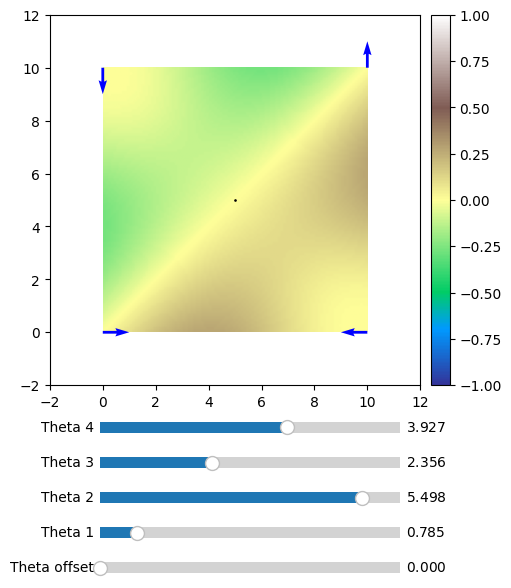

In [ ]:
# @title gradient_info
from functools import partial
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.widgets import Slider

# Функция для обновления векторов при изменении слайдеров
def update(val):
    global axs, sliders, X, Y
    theta_offset, *theta = list(map(lambda slider: slider.val, sliders))

    # Поворачиваем векторы
    vectors = np.array([[np.cos(theta[i] + theta_offset), np.sin(theta[i] + theta_offset)] for i in range(4)])
    gradient = np.array([[vectors[i + gradient_width*j] for i in range(gradient_width)] for j in range(gradient_height)])
    # print(gradient)
    heightmap = np.vectorize(partial(perlin_noise, gradient=gradient))(X, Y)

    # Обновляем данные векторов
    for quiver, v in zip(quivers, vectors):
        quiver.set_UVC(v[0], v[1])

    im.set_data(heightmap)
    center.set_offsets((5+vectors[:, 0].sum(), 5+vectors[:, 1].sum()))

    fig.canvas.draw_idle()

# Функция интерполяции
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    '''
    return a + (b - a) * t

# Функция для сглаживания
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре )
    '''
    if np.abs(t - 0.5) < 0.5:
        # return t
        return ( t**3 * (t * (6*t - 15) + 10) )
    else:
        if t <= 0:
            return 0
        else:
            return 1

# Функция для вычисления шума Перлина
def perlin_noise(x, y, gradient):
    '''
    Шум Перлина
    1. Создать таблицу градиентов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    gradient_height, gradient_width = gradient.shape[: 2]

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше gradient_height или gradient_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = np.dot(gradient[x0 % gradient_height, y0 % gradient_width], [dx, dy])
    n1 = np.dot(gradient[x1 % gradient_height, y0 % gradient_width], [dx - 1, dy])
    n2 = np.dot(gradient[x0 % gradient_height, y1 % gradient_width], [dx, dy - 1])
    n3 = np.dot(gradient[x1 % gradient_height, y1 % gradient_width], [dx - 1, dy - 1])

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)



# Исходные векторы, расположенные в вершинах квадрата
r = 10
position = np.array([[0, 0], [r, 0], [r, r], [0, r]])
vectors = np.array([[[1, -1], [0, 0]], [[0, 0], [1, -1]]])

x, y = position[:, 0], position[:, 1]
u, v = vectors[0].flatten(), vectors[1].flatten()

# Создадим карту высотностей
gradient_height, gradient_width = 2, 2
nx, ny = 100, 100
N = 1
X, Y = np.meshgrid(np.linspace(0, N, nx), np.linspace(0, N, ny))
heightmap = np.vectorize(partial(perlin_noise, gradient=vectors))(X, Y)

# Создание colormap
colormap_size = 1000 # Цоличество цветов(разрешение)
cmap_name = 'terrain' # Название colormap из matplotlib
viridis = mpl.colormaps[cmap_name].resampled(colormap_size) # Функция colormap [0, 1] -> [R, G, B, Alpha]
colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов

norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(5, 7))
plt.subplots_adjust(left=0.1, bottom=0.3)  # Оставляем место для слайдеров

#
im = ax.imshow(heightmap, norm=norm, cmap=cmap_name, origin='lower')
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes('right', size='5%', pad='3%')
cb = fig.colorbar(im, cax=cax)

center = ax.scatter(5+vectors[0].sum(), 5+vectors[1].sum(), color='black', s=0.8)

im.set_extent([0, 10, 0, 10])

# Рисуем исходные векторы
quivers = [ax.quiver(x[i], y[i], u[i], v[i], angles='xy', scale_units='xy', scale=1, color='b') for i in range(4)]

# Создаем слайдеры
axs = [plt.axes([0.2, 0.05 + i*0.05, 0.6, 0.03]) for i in range(5)]
min_values = [0, 0, 0, 0, 0]
max_values = [np.pi, 2*np.pi, 2*np.pi, 2*np.pi, 2*np.pi]
init_values = [0, np.pi/4, 7*np.pi/4, 3*np.pi/4, 5*np.pi/4]
sliders = [Slider(axs[i], f'Theta {i if i > 0 else "offset"}', min_values[i], max_values[i], valinit=init_values[i]) for i in range(5)]

# Привязываем функцию обновления к слайдерам
list(map(lambda slider: slider.on_changed(update), sliders))

# Устанавливаем пределы осей
ax.set_xlim([-2, 12])
ax.set_ylim([-2, 12])
ax.set_aspect('equal')
# ax.set_xticks([])
# ax.set_yticks([])

plt.show()

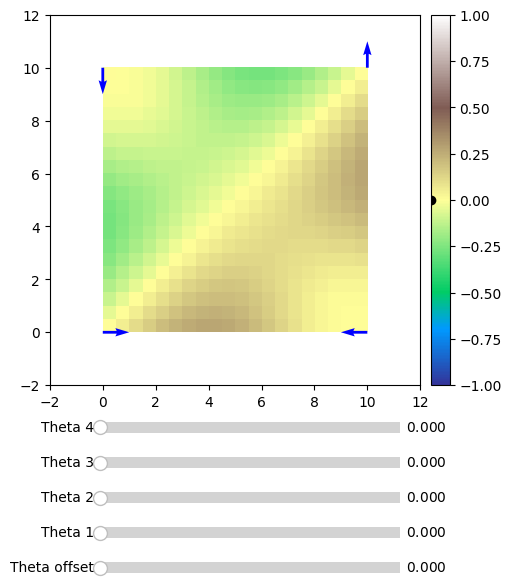

In [ ]:
# @title gradient_info2
from functools import partial
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.widgets import Slider

# Функция для обновления векторов при изменении слайдеров
def update(val):
    global axs, sliders, X, Y
    theta_offset, *theta = list(map(lambda slider: slider.val, sliders))

    # Поворачиваем векторы
    vectors = np.array([[np.cos(theta[i] + theta_offset), np.sin(theta[i] + theta_offset)] for i in range(4)])
    gradient = np.array([[vectors[i + gradient_width*j] for i in range(gradient_width)] for j in range(gradient_height)])
    # print(gradient)
    heightmap = np.vectorize(partial(perlin_noise, gradient=gradient))(X, Y)

    # Обновляем данные векторов
    for quiver, v in zip(quivers, vectors):
        quiver.set_UVC(v[0], v[1])

    im.set_data(heightmap)
    center.set_offsets((vectors[:, 0].sum(), vectors[:, 1].sum()))

    fig.canvas.draw_idle()

# Функция интерполяции
def interpolate(a, b, t):
    '''
    Bezier curve between two points
    '''
    return a + (b - a) * t

# Функция для сглаживания
def smoothstep(t):
    '''
    Smoothstep function ( https://en.wikipedia.org/wiki/Smoothstep )
    S_2(t) = 6t^5 - 15t^4 + 10t^3 = t**3 * (t * (6*t - 15) + 10)
    S_n(t) = ( t**(n+1) * sum([ binomial(n+k, k) * binomial(2*n+1, n-k) * (-t)**k for k in range(n+1)]) ) else ( 0 if t <= 0 else 1 )

    По сути, она сдвигает значение либо ближе к 0 или 1, либо оставляет значение 0.5( в центре )
    '''
    if np.abs(t - 0.5) < 0.5:
        # return t
        return ( t**3 * (t * (6*t - 15) + 10) )
    else:
        if t <= 0:
            return 0
        else:
            return 1

# Функция для вычисления шума Перлина
def perlin_noise(x, y, gradient):
    '''
    Шум Перлина
    1. Создать таблицу градиентов default=[256, 256]
    2. Находим координаты вершин чанка(квадрата), в котором будем находить значение
    3. Находим координаты точки в этом чанке ( координаты [0, 1) )
    4. Теперь выполняем скалярное произведение векторов. Вектор градиента в каждой вершине и вектора от этой вершины до точки (x, y), для того чтобы направление вектора градиента влияло на конечную высоту. Если все четыре вектора градиента направлены в центр чанка, то этот чанк - гора/возвышенность, но это мешает созданию "реалистичного" ландшафта(карты)
    5. Применяем сглаживание(smoothstep function) для точки внутри чанка (точка будет сдвигатья ближе к краю, либо останется в центре), чтобы значение градиента в вершине ( которая ближе всего к (x, y) ) сильнее влияло на значение в точке (x, y)
    6. Применяем линейную кривую к каждой вершине и по кажой оси. Сначало применяю к оси x, после по оси y.
    '''

    gradient_height, gradient_width = gradient.shape[: 2]

    # Координаты вершин чанка
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

    # Координаты вектора с началом в левом нижнем углу чанка и концом в (x, y)
    dx = x - x0
    dy = y - y0

    '''
    Скалярное произведение вектора градиента в вершине и вектора из этой вершины к точке (x, y)
    Если одна из координат вершины больше gradient_height или gradient_width, то просто берём остаток от деления по каждой координате
    '''
    n0 = np.dot(gradient[x0 % gradient_height, y0 % gradient_width], [dx, dy])
    n1 = np.dot(gradient[x1 % gradient_height, y0 % gradient_width], [dx - 1, dy])
    n2 = np.dot(gradient[x0 % gradient_height, y1 % gradient_width], [dx, dy - 1])
    n3 = np.dot(gradient[x1 % gradient_height, y1 % gradient_width], [dx - 1, dy - 1])

    # Создаём сглаживание для точки (x, y). Она сдвинется к ближайшей вершине
    u = smoothstep(dx)
    v = smoothstep(dy)

    x0_interp = interpolate(n0, n1, u)
    x1_interp = interpolate(n2, n3, u)
    return interpolate(x0_interp, x1_interp, v)



# Исходные векторы, расположенные в вершинах квадрата
r = 10
position = np.array([[0, 0], [r, 0], [r, r], [0, r]])
vectors = np.array([[[1, -1], [0, 0]], [[0, 0], [1, -1]]])

x, y = position[:, 0], position[:, 1]
u, v = vectors[0].flatten(), vectors[1].flatten()

# Создадим карту высотностей
gradient_height, gradient_width = 2, 2
nx, ny = 20, 20
N = 1
X, Y = np.meshgrid(np.linspace(0, N, nx), np.linspace(0, N, ny))
heightmap = np.vectorize(partial(perlin_noise, gradient=vectors))(X, Y)

# Создание colormap
colormap_size = 1000 # Цоличество цветов(разрешение)
cmap_name = 'terrain' # Название colormap из matplotlib
viridis = mpl.colormaps[cmap_name].resampled(colormap_size) # Функция colormap [0, 1] -> [R, G, B, Alpha]
colormap = viridis(np.linspace(0, 1, colormap_size)) # Создания массива цветов

norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(5, 7))
plt.subplots_adjust(left=0.1, bottom=0.3)  # Оставляем место для слайдеров

#
im = ax.imshow(heightmap, norm=norm, cmap=cmap_name, origin='lower')
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes('right', size='5%', pad='3%')
cb = fig.colorbar(im, cax=cax)

center = plt.scatter(vectors[0].sum(), vectors[1].sum(), color='black')

im.set_extent([0, 10, 0, 10])

# Рисуем исходные векторы
quivers = [ax.quiver(x[i], y[i], u[i], v[i], angles='xy', scale_units='xy', scale=1, color='b') for i in range(4)]

# Создаем слайдеры
axs = [plt.axes([0.2, 0.05 + i*0.05, 0.6, 0.03]) for i in range(5)]
sliders = [Slider(axs[i], f'Theta {i if i > 0 else "offset"}', 0, 2*np.pi, valinit=0) for i in range(5)]

# Привязываем функцию обновления к слайдерам
list(map(lambda slider: slider.on_changed(update), sliders))

# Устанавливаем пределы осей
ax.set_xlim([-2, 12])
ax.set_ylim([-2, 12])
ax.set_aspect('equal')
# ax.set_xticks([])
# ax.set_yticks([])

plt.show()

## Для любознательных

In [ ]:
# @title код для проверки распределения направления случайных векторов при разных способах
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.use('inline')

# params
fig_width, fig_height = 10, 6


fig = plt.figure(figsize=(fig_width, fig_height))


rect1_left = rect2_left = setback = 0.08
hspace = 0.14
rect2_bottom = setback + 0.02
rect1_height = rect2_height = ( 1 - rect2_bottom - setback - hspace) / 2
rect1_width = rect2_width = ( rect1_height*fig_height ) / fig_width
rect1_bottom = rect2_bottom + rect1_height + hspace
ax_rect1 = fig.add_subplot([
    rect1_left,
    rect1_bottom,
    rect1_width,
    rect1_height
])
ax_rect2 = fig.add_subplot([
    rect2_left,
    rect2_bottom,
    rect2_width,
    rect2_height
])

ax_plot1 = fig.add_subplot([
    rect1_left + rect1_width + setback,
    rect1_bottom,
    1 - setback*3 - rect1_width,
    rect1_height
])

ax_plot2 = fig.add_subplot([
    rect2_left + rect2_width + setback,
    rect2_bottom,
    1 - setback*3 - rect2_width,
    rect2_height
])

# np.random.seed(11233)

gradient_height, gradient_width = 10000, 10000
gradients1 = np.random.rand(gradient_height, gradient_width, 2) * 2 - 1  # Случайные векторы в диапазоне [-1, 1]
gradients1 /= np.linalg.norm(gradients1, axis=2, keepdims=True)  # Нормализация векторов

gradients_angle = np.random.rand(gradient_height, gradient_width) * 2 * np.pi  # Случайные угол вектора
gradients2 = np.zeros(shape=(gradient_height, gradient_width, 2))
gradients2[::, ::, 0] = np.cos(gradients_angle)
gradients2[::, ::, 1] = np.sin(gradients_angle)

@np.vectorize
def ArcTan(x, y):
    angle = np.arctan(y/x)
    if x == 0:
        if y > 0:
            return np.pi/2
        elif y < 0:
            return 3*np.pi/2
        else:
            return 0
    elif x > 0:
        if y >= 0:
            return angle
        else:
            return 2*np.pi + angle
    else:
        return np.pi + angle

data1 = ArcTan(gradients1[:, :, 0], gradients1[:, :, 1]).reshape((gradient_height*gradient_width, ))
data2 = ArcTan(gradients2[:, :, 0], gradients2[:, :, 1]).reshape((gradient_height*gradient_width, ))

X1, X2 = gradients1[:, :, 0].reshape((gradient_height*gradient_width, )), gradients2[:, :, 0].reshape((gradient_height*gradient_width, ))
Y1, Y2 = gradients1[:, :, 1].reshape((gradient_height*gradient_width, )), gradients2[:, :, 1].reshape((gradient_height*gradient_width, ))

ax_rect1.scatter(X1, Y1, s=0.01)
ax_rect2.scatter(X2, Y2, s=0.01)

ax_rect1.set_xlim([-1.1, 1.1])
ax_rect1.set_ylim([-1.1, 1.1])
ax_rect2.set_xlim([-1.1, 1.1])
ax_rect2.set_ylim([-1.1, 1.1])

n = gradient_height*gradient_width
N = int(np.sqrt(gradient_height*gradient_width))
d = np.round(2*np.pi/N, 4)
x = np.arange(d/2, d*N, d)
height1 = np.histogram(data1, bins=N, range=(0, 2*np.pi))[0] / N
height2 = np.histogram(data2, bins=N, range=(0, 2*np.pi))[0] / N

ax_plot1.bar(x, height1, width=d)
ax_plot1.text(0.05, 0.9, r'$\mu = 1,~ \sigma^2 = \dfrac{\pi - 3}{3} \approx 0.0472$', transform=ax_plot1.transAxes)
ax_plot1.plot(x, np.pi/np.max(2*np.array([np.cos(x), np.sin(x), -np.sin(x), -np.cos(x)]), axis=0)**2, label=r'$f(\theta) = \dfrac{\pi}{4 \max(\left|{\cos{\theta}}\right| , \left|{\sin{\theta}}\right|)^2}$', color='red')
ax_plot1.axhline(np.mean(height1), 0, 2*np.pi, color='black', linestyle='dotted')
ax_plot1.axhline(np.mean(height1)-np.std(height1), color='grey', linestyle='--')
ax_plot1.axhline(np.mean(height1)+np.std(height1), color='grey', linestyle='--')

ax_plot2.bar(x, height2, width=d)
ax_plot2.text(0.05, 0.9, r'$\mu = 1,~ \sigma^2 = 0$', transform=ax_plot2.transAxes)
ax_plot2.plot(x, x*0 + 1, label=r'$f(\theta) = 1$', color='red')
ax_plot2.axhline(np.mean(height2), color='black', linestyle='dotted')
ax_plot2.axhline(np.mean(height2)-np.std(height2), color='grey', linestyle='--')
ax_plot2.axhline(np.mean(height2)+np.std(height2), color='grey', linestyle='--')

ax_plot1.set_xlim([0, 2*np.pi])
ax_plot1.set_ylim([0, np.max(height1)*1.5])
ax_plot1.legend()
ax_plot2.set_xlim([0, 2*np.pi])
ax_plot2.set_ylim([0, np.max(height1)*1.5])
ax_plot2.legend()

ax_plot2.set_xticks([i*np.pi/4 for i in range(9)], labels=[r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3 \pi}{4}$', r'$\pi$', r'$\dfrac{5 \pi}{4}$', r'$\dfrac{3 \pi}{2}$', r'$\dfrac{7 \pi}{4}$', r'$2 \pi$'])
ax_plot1.sharex(ax_plot2)

ax_plot1.set_title('График 1. Случайная координата и нормализация.')
ax_plot2.set_title('График 2. Случайный угол.')

plt.show()

In [ ]:
height1.mean(), height1.std()

NameError: name 'height1' is not defined

In [ ]:
height2.mean(), height2.std()

NameError: name 'height2' is not defined

In [ ]:
height1.sum()*d, height2.sum()*d

In [ ]:
from sympy import symbols, Lambda, integrate, diff, sqrt, cos, sin, Max, Abs, pi, Piecewise
L = 2*pi
theta, t = symbols('theta, t', real=True)
fd = Lambda(t, Piecewise((0, t<0), (1/(2*pi), (0 <= t) & (t <= 2*pi)), (0, t > 2*pi)))
f1 = Lambda(t, pi / (4 * L * Max(cos(t), sin(t), -cos(t), -sin(t))**2))
f2 = Lambda(t, 1/L)
F1 = integrate(f1(t), (t, 0, theta))
F2 = integrate(f2(t), (t, 0, theta))
A1 = F1.subs(theta, 2*pi)
A2 = F2.subs(theta, 2*pi)
mu1 = integrate(f1(t)*fd(t), (t, 0, 2*pi)).simplify()
mu2 = integrate(f2(t)*fd(t), (t, 0, 2*pi)).simplify()
std1 = sqrt(integrate((f1(t) - mu1)**2 * fd(t), (t, 0, 2*pi))).simplify()
std2 = sqrt(integrate((f2(t) - mu2)**2 * fd(t), (t, 0, 2*pi))).simplify()

In [ ]:
A1

In [ ]:
A2

In [ ]:
mu1

In [ ]:
mu2

1/(2*pi)

In [ ]:
std1.evalf()

0.0345764072463404

In [ ]:
std2.simplify()

0

# Дополнительный код